In [ ]:
class Robot:
    def __init__(self, name, x=0, y=0):
        self.name = name
        self.x = x
        self.y = y
        self.history = []  # История: [(x, y), (x, y), ...]
        self.history.append((self.x, self.y)) # Сохранить начальную позицию в историю
        
    def command(self, cmd):
        """Выполняет команду: 'up', 'down', 'left', 'right'"""
        if cmd == "up":
            self.y += 1
            self.history.append((self.x, self.y))
        elif cmd == "down":
            self.y -= 1
            self.history.append((self.x, self.y))
        elif cmd == "left":
            self.x -= 1
            self.history.append((self.x, self.y))
        elif cmd == "right":
            self.x += 1
            self.history.append((self.x, self.y))
    


    def show_history(self):
        """Показывает всю историю движения"""
        print(self.history)

    def parse_combo_command(self, combo_cmd):
        """
        Разбирает комбинированную команду на простые с валидацией
        'north+east' → ['up', 'right']
        'south+west' → ['down', 'left']
        Возвращает список команд или None при ошибке
        """
        # Словарь перевода команд
        direction_map = {
            'north': 'up',
            'south': 'down', 
            'west': 'left',
            'east': 'right'
        }
        
        # Проверка наличия разделителя
        if "+" not in combo_cmd:
            if combo_cmd in direction_map:
                return [direction_map[combo_cmd]]
            else:
                return None
        
        # Разбить команду через split("+")
        parts = combo_cmd.split("+")
        
        # Проверить, что частей ровно 2
        if len(parts) != 2:
            return None
            
        # Проверить, что обе части есть в direction_map
        if parts[0] not in direction_map or parts[1] not in direction_map:
            return None
            
        # Вернуть список переведенных команд
        return [direction_map[parts[0]], direction_map[parts[1]]]

    def combo_move(self, combo_cmd):
        """Выполняет комбинированную команду"""
        commands = self.parse_combo_command(combo_cmd)
        if commands:
            for cmd in commands:
                self.command(cmd)
            return True
        return False

    def repeat_combo(self, combo_cmd, times):
        """Повторяет комбинированное движение заданное количество раз"""
        print(f"🔄 Повторяем '{combo_cmd}' {times} раз")
        for i in range(times):
            self.combo_move(combo_cmd)
            print(f"  Повтор {i+1}: робот в ({self.x}, {self.y})")



NameError: name 'combo_cmd' is not defined

In [ ]:


# Тест в ячейке:
print("🧪 ТЕСТ 1.1: История состояний")
robot = Robot("Тест", 0, 0)
robot.command("right")
robot.command("right") 
robot.command("up")
robot.show_history()

# Автоматическая проверка результата:
expected_history = [(0,0), (1,0), (2,0), (2,1)]
if robot.history == expected_history:
    print("✅ ТЕСТ ПРОЙДЕН: История корректна")
else:
    print(f"❌ ТЕСТ НЕ ПРОЙДЕН: Ожидалось {expected_history}, получено {robot.history}")

# Дополнительный тест - возврат домой:
robot2 = Robot("Тест2", 5, 3)
robot2.command("left")
robot2.command("down") 
robot2.command("right")
robot2.command("up")

expected_history2 = [(5,3), (4,3), (4,2), (5,2), (5,3)]
if robot2.history == expected_history2:
    print("✅ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ ПРОЙДЕН: Возврат в исходную точку")
else:
    print(f"❌ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ НЕ ПРОЙДЕН: Ожидалось {expected_history2}, получено {robot2.history}")

🧪 ТЕСТ 1.1: История состояний
[(0, 0), (1, 0), (2, 0), (2, 1)]
✅ ТЕСТ ПРОЙДЕН: История корректна
✅ ДОПОЛНИТЕЛЬНЫЙ ТЕСТ ПРОЙДЕН: Возврат в исходную точку


🧪 ТЕСТ 1.1: История состояний
[(0, 0), (1, 0), (2, 0), (2, 1)]

🧪 ТЕСТ 1.2: Визуализация пути


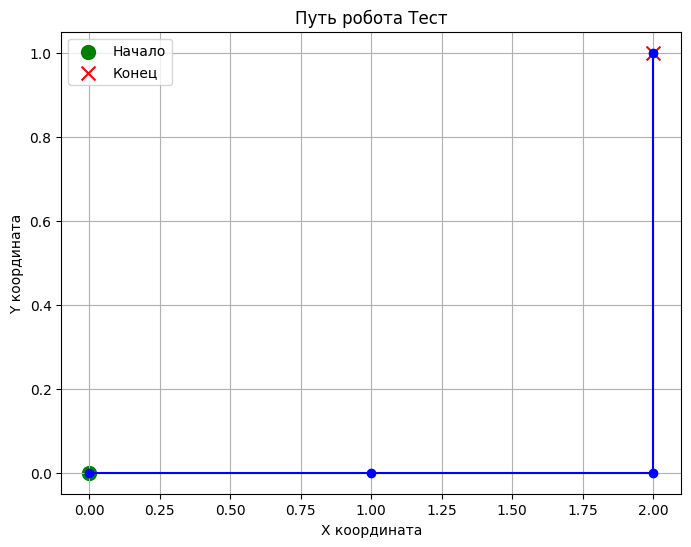

In [ ]:

import matplotlib.pyplot as plt
def plot_robot_path(robot):
    """Рисует график пути робота"""
    if not robot.history:
        print("История пуста!")
        return
    
    # TODO: Извлечь x_coords и y_coords из robot.history
    x_coords = [p[0] for p in robot.history] # ваш код: извлечь все x из кортежей
    y_coords = [p[1] for p in robot.history] # ваш код: извлечь все y из кортежей
    
    plt.figure(figsize=(8, 6))
    # TODO: Нарисовать линию и точки
    plt.plot(x_coords, y_coords, 'b-o')  # синяя линия с точками
    plt.scatter(x_coords[0], y_coords[0], color='green', marker='o', s=100, label='Начало') # Начальная точка
    plt.scatter(x_coords[-1], y_coords[-1], color='red', marker='x', s=100, label='Конец') # Конечная точка
    plt.title(f"Путь робота {robot.name}")
    plt.grid(True)
    plt.xlabel("X координата")
    plt.ylabel("Y координата")
    plt.legend()
    plt.show()

# Тест:
print("\n🧪 ТЕСТ 1.2: Визуализация пути")
plot_robot_path(robot)

# Проверка извлечения координат:
test_history = [(0,0), (1,2), (3,1)]
x_coords = [p[0] for p in test_history]
y_coords = [p[1] for p in test_history]

if x_coords == [0, 1, 3] and y_coords == [0, 2, 1]:
    print("✅ ПРОВЕРКА КООРДИНАТ ПРОЙДЕНА: Координаты извлечены корректно")
else:
    print(f"❌ ПРОВЕРКА КООРДИНАТ НЕ ПРОЙДЕНА: Ожидалось x:[0, 1, 3], y:[0, 2, 1], получено x:{x_coords}, y:{y_coords}")

In [39]:
#Задача: Метод для повторения комбинированного движения N раз


class Robot:
    def __init__(self, name, x=0, y=0):
        self.name = name
        self.x = x
        self.y = y
        self.history = []  # История: [(x, y), (x, y), ...]
        self.history.append((self.x, self.y)) # Сохранить начальную позицию в историю
        
    def command(self, cmd):
        """Выполняет команду: 'up', 'down', 'left', 'right'"""
        if cmd == "up":
            self.y += 1
            self.history.append((self.x, self.y))
        elif cmd == "down":
            self.y -= 1
            self.history.append((self.x, self.y))
        elif cmd == "left":
            self.x -= 1
            self.history.append((self.x, self.y))
        elif cmd == "right":
            self.x += 1
            self.history.append((self.x, self.y))
    
    def repeat_combo(self, combo_cmd, times):
        """Повторяет комбинированное движение заданное количество раз"""
    print(f"🔄 Повторяем '{combo_cmd}' {times} раз")
    for i in range(times):
        # TODO: выполнить combo_move
        print(f"  Повтор {i+1}: робот в ({self.x}, {self.y})")

    def show_history(self):
        """Показывает всю историю движения"""
        print(self.history)

    def parse_combo_command(self, combo_cmd):
        """
        Разбирает комбинированную команду на простые с валидацией
        'north+east' → ['up', 'right']
        'south+west' → ['down', 'left']
        Возвращает список команд или None при ошибке
        """
        # Словарь перевода команд
        direction_map = {
            'north': 'up',
            'south': 'down', 
            'west': 'left',
            'east': 'right'
        }
        
        # Проверка наличия разделителя
        if "+" not in combo_cmd:
            if combo_cmd in direction_map:
                return [direction_map[combo_cmd]]
            else:
                return None
        
        # Разбить команду через split("+")
        parts = combo_cmd.split("+")
        
        # Проверить, что частей ровно 2
        if len(parts) != 2:
            return None
            
        # Проверить, что обе части есть в direction_map
        if parts[0] not in direction_map or parts[1] not in direction_map:
            return None
            
        # Вернуть список переведенных команд
        return [direction_map[parts[0]], direction_map[parts[1]]]

    def combo_move(self, combo_cmd):
        """Выполняет комбинированную команду"""
        commands = self.parse_combo_command(combo_cmd)
        if commands:
            for cmd in commands:
                self.command(cmd)
            return True
        return False

    def repeat_combo(self, combo_cmd, times):
        """Повторяет комбинированное движение заданное количество раз"""
        print(f"🔄 Повторяем '{combo_cmd}' {times} раз")
        for i in range(times):
            self.combo_move(combo_cmd)
            print(f"  Повтор {i+1}: робот в ({self.x}, {self.y})")


# Добавить метод в класс Robot
# Тест:
print("\n🧪 ТЕСТ 3: Повторение комбинированного движения")

robot = Robot("Повторитель", 0, 0)
robot.repeat_combo("north+east", 3)

expected_pos = (3, 3)
if (robot.x, robot.y) == expected_pos:
    print(f"✅ ТЕСТ ПРОЙДЕН: Финальная позиция {expected_pos}")
else:
    print(f"❌ ТЕСТ НЕ ПРОЙДЕН: Ожидалось {expected_pos}, получено ({robot.x}, {robot.y})")

# Проверка общего количества шагов в истории
expected_steps = 7  # начальная + 6 шагов (3 повтора × 2 команды)
if len(robot.history) == expected_steps:
    print(f"✅ КОЛИЧЕСТВО ШАГОВ КОРРЕКТНО: {expected_steps}")
else:
    print(f"❌ КОЛИЧЕСТВО ШАГОВ НЕВЕРНО: Ожидалось {expected_steps}, получено {len(robot.history)}")

# Визуализация результата:
plot_robot_path(robot)

NameError: name 'combo_cmd' is not defined